In [1]:
%matplotlib inline
import pandas as pd, seaborn as sns, numpy as np, os, matplotlib.pyplot as plt
from tqdm import tqdm
from helper_funcs import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.externals import joblib
from imblearn.ensemble import BalancedRandomForestClassifier # !!!!!! balanced!
from IPython.display import display, Markdown

def md(txt): display(Markdown(txt))

if not 'df' in globals(): 
    df = pd.read_parquet('data/involved_hebrew.parquet')
    df, val_map, imputed, cols = remove_hebrew_and_impute(df)
    X,Y, x_cols = get_XY(df, cols)

if not 'brf' in globals():
    model_fname = 'models/2018_11_20_injury_risk_balanced_RF_classifier_full_03.joblib'
    brf = joblib.load(model_fname)

100%|████████████████████████████████████████████████████████████████████████████████| 289/289 [00:03<00:00, 77.38it/s]


[131/131] features ████████████████████ Time elapsed: 2892 seconds

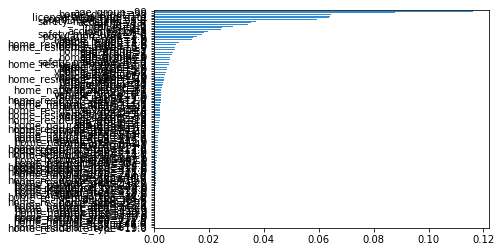

In [2]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(X, feature_names=x_cols)
model = InMemoryModel(brf.predict_proba, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending = False)

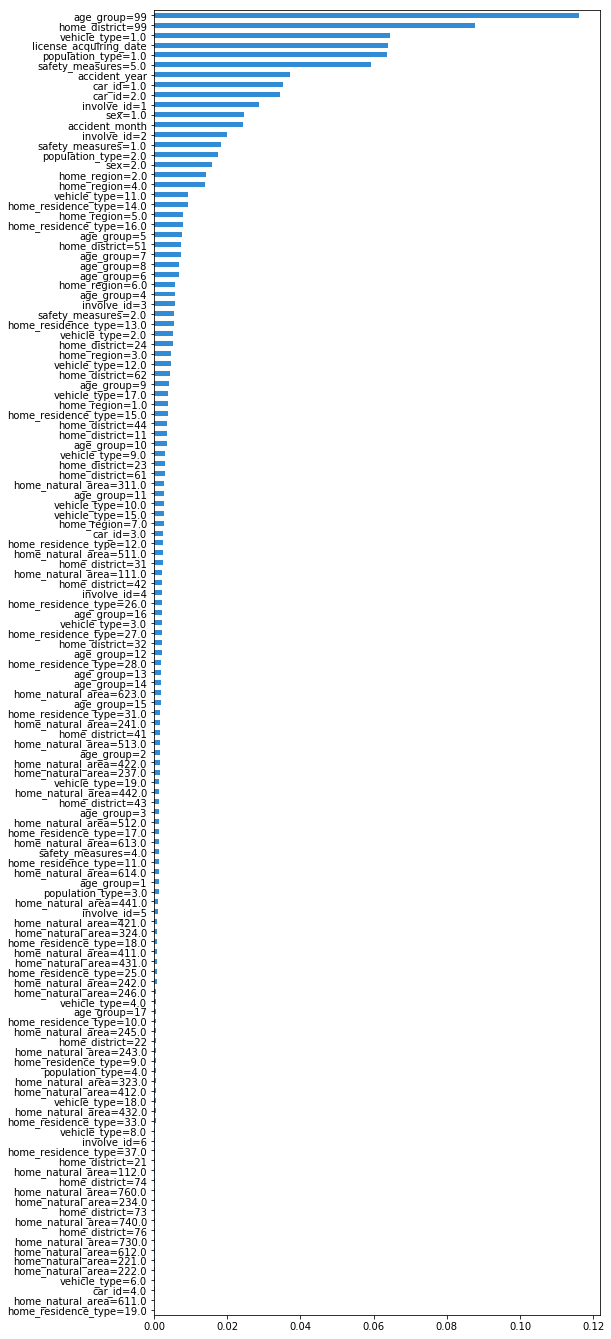

In [36]:
fig = plots[0]
fig.set_size_inches(8,24)
fig